# Turning Tweets into Knowledge: An Introduction to Text Analytics

<img src="images/twitter.png"/>

### Load and Exploration the Data

We need add this extra argument when working on a text analytics problem so that the text is read in properly:

    stringsAsFactors=FALSE.

In [1]:
tweets = read.csv("data/tweets.csv", stringsAsFactors=FALSE)

head(tweets)

,Tweet,Avg
,<chr>,<dbl>
1,"I have to say, Apple has by far the best customer care service I have ever received! @Apple @AppStore",2.0
2,iOS 7 is so fricking smooth & beautiful!! #ThanxApple @Apple,2.0
3,LOVE U @APPLE,1.8
4,"Thank you @apple, loving my new iPhone 5S!!!!! #apple #iphone5S pic.twitter.com/XmHJCU4pcb",1.8
5,.@apple has the best customer service. In and out with a new phone in under 10min!,1.8
6,@apple ear pods are AMAZING! Best sound from in-ear headphones I've ever had!,1.8


In [2]:
str(tweets)

'data.frame':	1181 obs. of  2 variables:
 $ Tweet: chr  "I have to say, Apple has by far the best customer care service I have ever received! @Apple @AppStore" "iOS 7 is so fricking smooth & beautiful!! #ThanxApple @Apple" "LOVE U @APPLE" "Thank you @apple, loving my new iPhone 5S!!!!!  #apple #iphone5S pic.twitter.com/XmHJCU4pcb" ...
 $ Avg  : num  2 2 1.8 1.8 1.8 1.8 1.8 1.6 1.6 1.6 ...


We can see that we have 1,181 observations of two variables, the text of the tweet, called Tweet, and the average sentiment score, called Avg for average. The tweet texts are real tweets that we found on the internet directed to Apple with a few cleaned up words.

### Create dependent variable

We're more interested in being able to detect the tweets with clear negative sentiment,so let's define a new variable in our data set tweets called Negative.

In [3]:
tweets$Negative = as.factor(tweets$Avg <= -1)

head(tweets)

,Tweet,Avg,Negative
,<chr>,<dbl>,<fct>
1,"I have to say, Apple has by far the best customer care service I have ever received! @Apple @AppStore",2.0,FALSE
2,iOS 7 is so fricking smooth & beautiful!! #ThanxApple @Apple,2.0,FALSE
3,LOVE U @APPLE,1.8,FALSE
4,"Thank you @apple, loving my new iPhone 5S!!!!! #apple #iphone5S pic.twitter.com/XmHJCU4pcb",1.8,FALSE
5,.@apple has the best customer service. In and out with a new phone in under 10min!,1.8,FALSE
6,@apple ear pods are AMAZING! Best sound from in-ear headphones I've ever had!,1.8,FALSE


In [4]:
# See how many tweets are negative feeling
table(tweets$Negative)


FALSE  TRUE 
  999   182 

There is 182 tweets with negative feeling.

## Pre-Processing in R

### Necessary Libraries

In [5]:
#install.packages("tm")
#install.packages("SnowballC")

In [6]:
library(tm)
library(SnowballC)

Loading required package: NLP



One of the concepts introduced by the tm package is that of a corpus. A corpus is a collection of documents. We'll need to convert our tweets to a corpus for pre-processing. Tm can create a corpus in many different ways, but we'll create it from the tweet column of our data frame using two functions, Corpus and VectorSource.

In [7]:
# Create Corpus
corpus = VCorpus(VectorSource(tweets$Tweet))
corpus

<<VCorpus>>
Metadata:  corpus specific: 0, document level (indexed): 0
Content:  documents: 1181

In [8]:
# Test Corpus
corpus[[1]]$content

[1] "I have to say, Apple has by far the best customer care service I have ever received! @Apple @AppStore"

### Convert to lower-case

In [9]:
# Convert to lower-case
corpus = tm_map(corpus, tolower)

# For the latest version of the tm package
corpus = tm_map(corpus, PlainTextDocument)

# Test Corpus
corpus[[1]]$content

[1] "i have to say, apple has by far the best customer care service i have ever received! @apple @appstore"

### Remove punctuation

In [10]:
# Remove punctuation
corpus = tm_map(corpus, removePunctuation)

corpus[[1]]$content

[1] "i have to say apple has by far the best customer care service i have ever received apple appstore"

### Stop Words

In [11]:
# Look at stop words
stopwords("english")[1:10]

[1] "i"         "me"        "my"        "myself"    "we"        "our"      
 [7] "ours"      "ourselves" "you"       "your"

In [12]:
# Remove stopwords and apple
corpus = tm_map(corpus, removeWords, c("apple", stopwords("english")))

corpus[[1]]$content

[1] "   say    far  best customer care service   ever received  appstore"

In [13]:
# Stem document 
corpus = tm_map(corpus, stemDocument)

corpus[[1]]$content

[1] "say far best custom care servic ever receiv appstor"

### Create Matrix

The tm package provides a function called *DocumentTermMatrix* that generates a matrix where the rows correspond to documents, in our case tweets, and the columns correspond to words in those tweets. The values in the matrix are the number of times that word appears in each document

In [14]:
frequencies = DocumentTermMatrix(corpus)
frequencies

<<DocumentTermMatrix (documents: 1181, terms: 3289)>>
Non-/sparse entries: 8980/3875329
Sparsity           : 100%
Maximal term length: 115
Weighting          : term frequency (tf)

In [15]:
# Look at matrix
# inspect(frequencies[1000:1005,505:515])

In [16]:
# Check for sparsity
findFreqTerms(frequencies, lowfreq=20)

[1] "android"              "anyon"                "app"                 
 [4] "appl"                 "back"                 "batteri"             
 [7] "better"               "buy"                  "can"                 
[10] "cant"                 "come"                 "dont"                
[13] "fingerprint"          "freak"                "get"                 
[16] "googl"                "ios7"                 "ipad"                
[19] "iphon"                "iphone5"              "iphone5c"            
[22] "ipod"                 "ipodplayerpromo"      "itun"                
[25] "just"                 "like"                 "lol"                 
[28] "look"                 "love"                 "make"                
[31] "market"               "microsoft"            "need"                
[34] "new"                  "now"                  "one"                 
[37] "phone"                "pleas"                "promo"               
[40] "promoipodplayerpromo" "realli"               "releas"              
[43] "samsung"              "say"                  "store"               
[46] "thank"                "think"                "time"                
[49] "twitter"              "updat"                "use"                 
[52] "via"                  "want"                 "well"                
[55] "will"                 "work"

In [17]:
# Remove sparse terms
sparse = removeSparseTerms(frequencies, 0.995)
sparse

<<DocumentTermMatrix (documents: 1181, terms: 309)>>
Non-/sparse entries: 4669/360260
Sparsity           : 99%
Maximal term length: 20
Weighting          : term frequency (tf)

Now let's convert the sparse matrix into a data frame that we'll be able to use for our predictive models.

In [18]:
# Convert to a data frame
tweetsSparse = as.data.frame(as.matrix(sparse))
head(tweetsSparse)

,244tsuyoponzu,7evenstarz,actual,add,alreadi,alway,amaz,amazon,android,announc,⋯,world,worst,wow,wtf,yall,year,yes,yet,yooo,your
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
character.0.,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
character.0..1,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
character.0..2,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
character.0..3,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
character.0..4,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
character.0..5,0,0,0,0,0,0,1,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


Since R struggles with variable names that start with a number, and we probably have some words here that start with a number,
let's run the *make.names* function to make sure all of our words are appropriate variable names.

In [19]:
# Make all variable names R-friendly
colnames(tweetsSparse) = make.names(colnames(tweetsSparse))

head(tweetsSparse)

,X244tsuyoponzu,X7evenstarz,actual,add,alreadi,alway,amaz,amazon,android,announc,⋯,world,worst,wow,wtf,yall,year,yes,yet,yooo,your
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
character.0.,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
character.0..1,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
character.0..2,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
character.0..3,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
character.0..4,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
character.0..5,0,0,0,0,0,0,1,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


This will just convert our variable names to make sure they're all appropriate names before we build our predictive models.

Now let's add our dependent variable to this data set.

In [20]:
# Add dependent variable
tweetsSparse$Negative = tweets$Negative

head(tweetsSparse)

,X244tsuyoponzu,X7evenstarz,actual,add,alreadi,alway,amaz,amazon,android,announc,⋯,worst,wow,wtf,yall,year,yes,yet,yooo,your,Negative
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
character.0.,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,FALSE
character.0..1,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,FALSE
character.0..2,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,FALSE
character.0..3,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,FALSE
character.0..4,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,FALSE
character.0..5,0,0,0,0,0,0,1,0,0,0,⋯,0,0,0,0,0,0,0,0,0,FALSE


### Split the data

In [21]:
library(caTools)

Let's split our data into a training set and a testing set, putting 70% of the data in the training set.

In [22]:
set.seed(123)

split = sample.split(tweetsSparse$Negative, SplitRatio = 0.7)

trainSparse = subset(tweetsSparse, split==TRUE)
testSparse = subset(tweetsSparse, split==FALSE)

### Build a CART model

In [23]:
library(rpart)
library(rpart.plot)

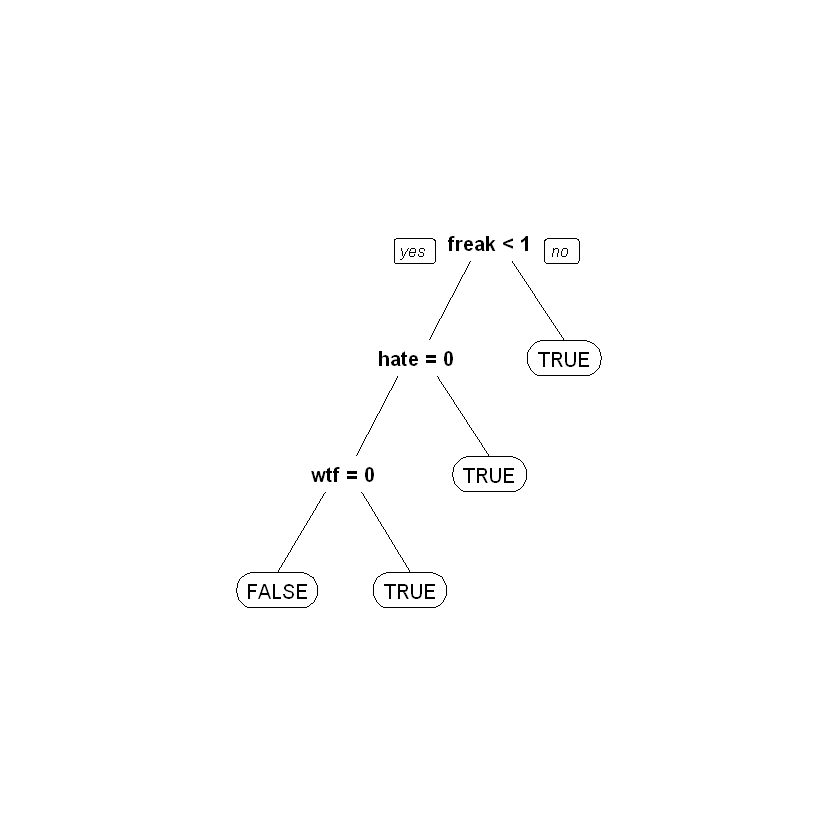

In [24]:
# Classification and Regression Trees (CART)
tweetCART = rpart(Negative ~ ., data=trainSparse, method="class")

# Plot Tree
prp(tweetCART)

Our tree says that if the word "freak" is in the tweet, then predict TRUE, or negative sentiment. If the word "freak" is not in the tweet, but the word "hate" is, again predict TRUE. If neither of these two words are in the tweet, but the word "wtf" is, also predict TRUE, or negative sentiment. If none of these three words are in the tweet, then predict FALSE, or non-negative sentiment.

### Evaluate the performance of the model

In [25]:
# Make Predictions
predictCART = predict(tweetCART, newdata=testSparse, type="class")

# Confusion Matrix
cmCA = table(testSparse$Negative, predictCART)
cmCA

       predictCART
        FALSE TRUE
  FALSE   294    6
  TRUE     37   18

The rows are labeled with the actual outcome, and the columns are labeled with the predicted outcome.

                      Predict 0       Predict 1
        Actual 0    True Negative   False Positive
        Actual 1    False Negative  True Positive

        cmCA = [1][3]
               [2][4]

In [26]:
# Compute Classification and Regression Trees Accuracy
accurCA = sum(diag(cmCA))/sum(cmCA)
paste("Accuracy CART:", round(accurCA,digits=4))

[1] "Accuracy CART: 0.8789"

In [27]:
# Compute Baseline Accuracy
Bl = table(testSparse$Negative)

accurBl = max(Bl)/sum(Bl)
paste("Accuracy Baseline:", round(accurBl,digits=4))

[1] "Accuracy Baseline: 0.8451"

### Random Forest model

In [28]:
library(randomForest)

randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.



In [29]:
set.seed(123)

# Random Forrest Model
tweetRF = randomForest(Negative ~ ., data=trainSparse)

In [30]:
# Make predictions:
predictRF = predict(tweetRF, newdata=testSparse)

# Confusion Matrix
cmRF = table(testSparse$Negative, predictRF)
cmRF

       predictRF
        FALSE TRUE
  FALSE   293    7
  TRUE     34   21

In [31]:
# Compute Classification and Regression Trees Accuracy
accurRF = sum(diag(cmRF))/sum(cmRF)
paste("Accuracy Random Forrest:", round(accurRF,digits=4))

[1] "Accuracy Random Forrest: 0.8845"

### Comparation

In [32]:
paste("Accuracy Baseline:", round(accurBl,digits=4))
paste("Accuracy CART:", round(accurCA,digits=4))
paste("Accuracy Random Forrest:", round(accurRF,digits=4))

[1] "Accuracy Baseline: 0.8451"

[1] "Accuracy CART: 0.8789"

[1] "Accuracy Random Forrest: 0.8845"

I'd probably prefer it over the Random Forest model. If you were to use Cross-Validation to pick the cp parameter for the CART model, the accuracy would increase to about the same as the random forest model. So by using a bag-of-words approach and these models, we can reasonably predict sentiment even with a relatively small data set of tweets.